# Proyek Analisis Data: Bike Sharing Dataset

#### **Nama**: Raditya Arviandana
#### **Email**: raditya.arviandana@mail.ugm.ac.id
#### **ID Dicoding**: arviandana

## Masalah

1. Pada saat apa tingkat peminjaman sepeda berada pada puncaknya? 
    1. Pada musim apa?
    2. Bulan apa?
    3. Hari apa?
    4. Jam berapa?
    5. Pada keadaan cuaca seperti apa?
2. Bagaimana tren peminjaman sepeda dari tahun ke tahun? Bagaimana jika pada tahun 2011 atau 2012?
3. Apakah benar bahwa kondisi cuaca, seperti suhu, angin, dan kelembaban, memengaruhi tingkat peminjaman sepeda?

## Import Library

In [96]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

## Data Wrangling

### Gathering Data

In [97]:
df = pd.read_csv('Dataset/Bike-sharing-dataset/hour.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [99]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [100]:
df.duplicated().any()

False

In [101]:
for i in df.columns:
    print(i, df[i].unique())

instant [    1     2     3 ... 17377 17378 17379]
dteday ['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'
 '2011-01-06' '2011-01-07' '2011-01-08' '2011-01-09' '2011-01-10'
 '2011-01-11' '2011-01-12' '2011-01-13' '2011-01-14' '2011-01-15'
 '2011-01-16' '2011-01-17' '2011-01-18' '2011-01-19' '2011-01-20'
 '2011-01-21' '2011-01-22' '2011-01-23' '2011-01-24' '2011-01-25'
 '2011-01-26' '2011-01-27' '2011-01-28' '2011-01-29' '2011-01-30'
 '2011-01-31' '2011-02-01' '2011-02-02' '2011-02-03' '2011-02-04'
 '2011-02-05' '2011-02-06' '2011-02-07' '2011-02-08' '2011-02-09'
 '2011-02-10' '2011-02-11' '2011-02-12' '2011-02-13' '2011-02-14'
 '2011-02-15' '2011-02-16' '2011-02-17' '2011-02-18' '2011-02-19'
 '2011-02-20' '2011-02-21' '2011-02-22' '2011-02-23' '2011-02-24'
 '2011-02-25' '2011-02-26' '2011-02-27' '2011-02-28' '2011-03-01'
 '2011-03-02' '2011-03-03' '2011-03-04' '2011-03-05' '2011-03-06'
 '2011-03-07' '2011-03-08' '2011-03-09' '2011-03-10' '2011-03-11'
 '2011-03-12' '2011

### Cleaning Data

In [102]:
df['yr'] = df['yr'].map({0: 2011, 1: 2012})
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [103]:
df['season'] = df['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Springer,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Springer,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Springer,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [104]:
df[df['workingday'] == 1]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
47,48,2011-01-03,Springer,2011,1,0,0,1,1,1,0.22,0.1970,0.44,0.3582,0,5,5
48,49,2011-01-03,Springer,2011,1,1,0,1,1,1,0.20,0.1667,0.44,0.4179,0,2,2
49,50,2011-01-03,Springer,2011,1,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,1,1
50,51,2011-01-03,Springer,2011,1,5,0,1,1,1,0.16,0.1364,0.47,0.2836,0,3,3
51,52,2011-01-03,Springer,2011,1,6,0,1,1,1,0.14,0.1061,0.50,0.3881,0,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Springer,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Springer,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Springer,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [105]:
hour_map = {0: '12 AM',
           1: '1 AM',
           2: '2 AM',
           3: '3 AM',
           4: '4 AM',
           5: '5 AM',
           6: '6 AM',
           7: '7 AM',
           8: '8 AM',
           9: '9 AM',
           10: '10 AM',
           11: '11 AM',
           12: '12 PM',
           13: '1 PM',
           14: '2 PM',
           15: '3 PM',
           16: '4 PM',
           17: '5 PM',
           18: '6 PM',
           19: '7 PM',
           20: '8 PM',
           21: '9 PM',
           22: '10 PM',
           23: '11 PM'}

In [106]:
df['hr'] = df['hr'].map(hour_map)

In [107]:
df['mnth'] = df['mnth'].map({1: 'January',
                             2: 'February',
                             3: 'March',
                             4: 'April',
                             5: 'May',
                             6: 'June',
                             7: 'July',
                             8: 'August',
                             9: 'September',
                             10: 'October',
                             11: 'November',
                             12: 'Desember'})
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,12 AM,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,January,1 AM,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,January,2 AM,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,January,3 AM,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,January,4 AM,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,Desember,7 PM,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Springer,2012,Desember,8 PM,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Springer,2012,Desember,9 PM,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Springer,2012,Desember,10 PM,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [108]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [109]:
df['weekday'] = df['weekday'].map({0: 'Monday',
                                   1: 'Tuesday',
                                   2: 'Wednesday',
                                   3: 'Thursday',
                                   4: 'Friday',
                                   5: 'Saturday',
                                   6: 'Sunday'})
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,12 AM,0,Sunday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,January,1 AM,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,January,2 AM,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,January,3 AM,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,January,4 AM,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,Desember,7 PM,0,Tuesday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Springer,2012,Desember,8 PM,0,Tuesday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Springer,2012,Desember,9 PM,0,Tuesday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Springer,2012,Desember,10 PM,0,Tuesday,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [145]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%Y-%m-%d')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,12 AM,0,Sunday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,January,1 AM,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,January,2 AM,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,January,3 AM,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,January,4 AM,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,Desember,7 PM,0,Tuesday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Springer,2012,Desember,8 PM,0,Tuesday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Springer,2012,Desember,9 PM,0,Tuesday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Springer,2012,Desember,10 PM,0,Tuesday,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [150]:
start_date = df['dteday'].min()
end_date = df["dteday"].max()

df[(df['dteday'] >= start_date) & (df['dteday'] <= end_date)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,12 AM,0,Sunday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,January,1 AM,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,January,2 AM,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,January,3 AM,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,January,4 AM,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,Desember,7 PM,0,Tuesday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Springer,2012,Desember,8 PM,0,Tuesday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Springer,2012,Desember,9 PM,0,Tuesday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Springer,2012,Desember,10 PM,0,Tuesday,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Data Visualization

In [111]:
sb.set_style('whitegrid')

### Pertanyaan 1

(Jawaban akan diberikan dan dijelaskan pada bagian Jawaban di bawah)

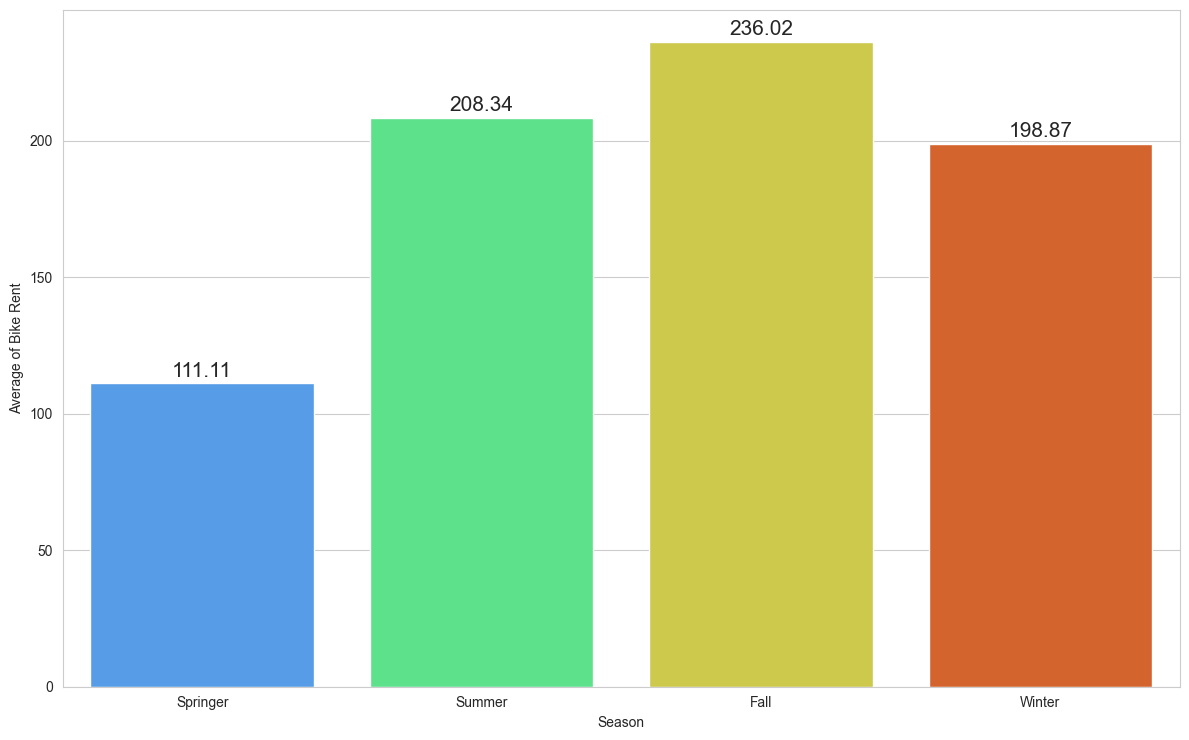

In [112]:
fig, ax = plt.subplots(figsize = (12,7.5))

ax = sb.barplot(data = df, x = 'season', y = 'cnt', dodge = False, ax = ax, palette = 'turbo', errorbar = None)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=2, fontsize=15, fmt = "{:.2f}")
# ax.margins(x=0.15) # optionally more space for the text

#plt.xticks(rotation = 45)
plt.xlabel('Season')
plt.ylabel('Average of Bike Rent')
plt.tight_layout()
plt.show()

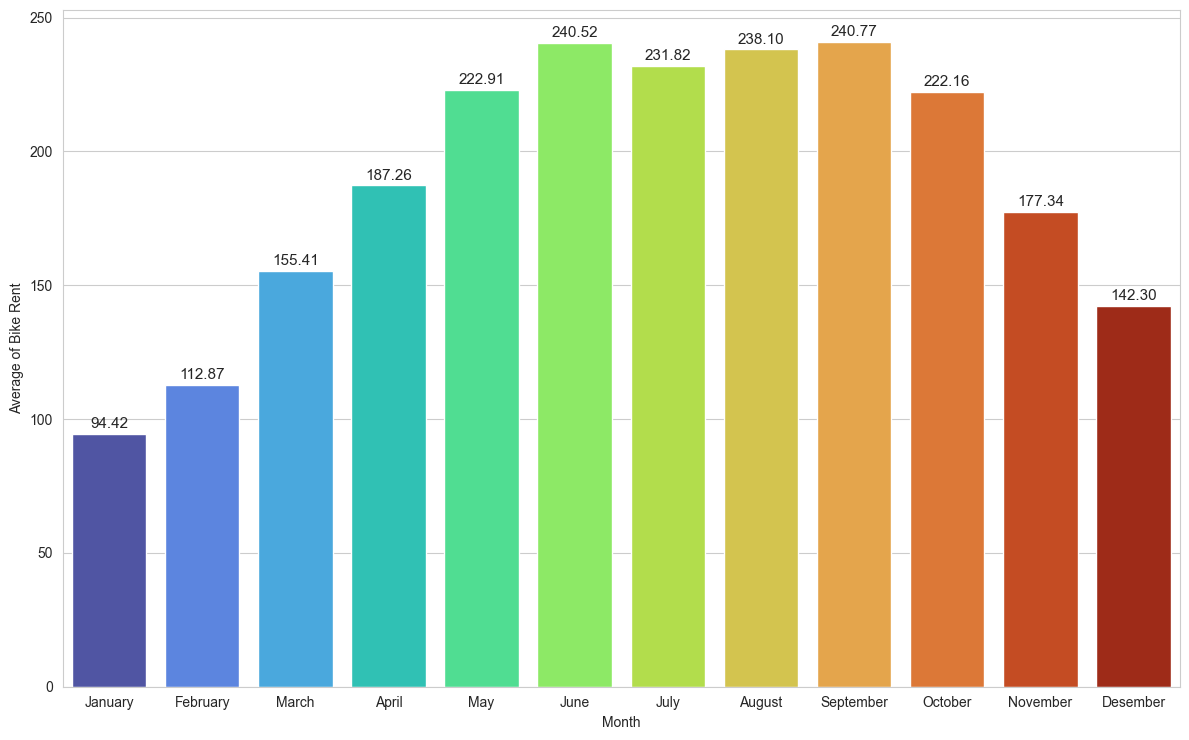

In [113]:
fig, ax = plt.subplots(figsize = (12,7.5))

ax = sb.barplot(data = df, x = 'mnth', y = 'cnt', dodge = False, ax = ax, palette = 'turbo', errorbar = None)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=2, fontsize=11, fmt = "{:.2f}")
# ax.margins(x=0.15) # optionally more space for the text

#plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.ylabel('Average of Bike Rent')
plt.tight_layout()
plt.show()

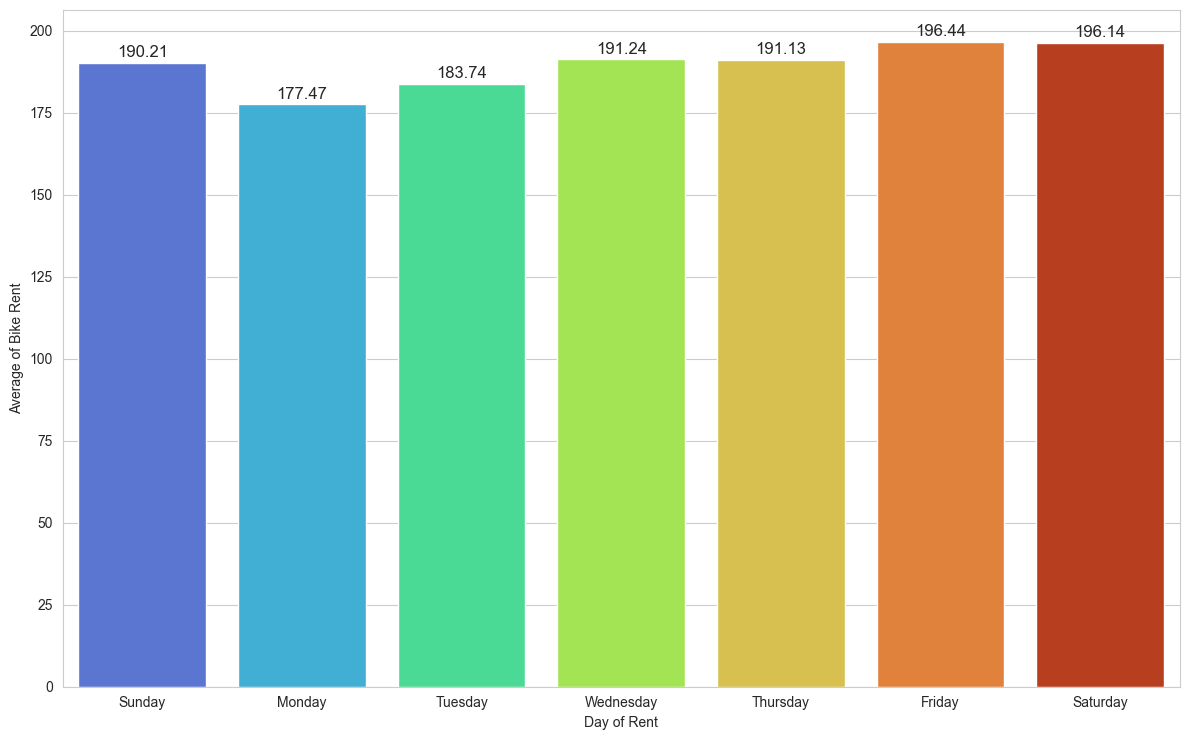

In [114]:
fig, ax = plt.subplots(figsize = (12,7.5))

ax = sb.barplot(data = df, x = 'weekday', y = 'cnt', dodge = False, ax = ax, palette = 'turbo', errorbar = None)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=2, fontsize=12, fmt = "{:.2f}")
# ax.margins(x=0.15) # optionally more space for the text

#plt.xticks(rotation = 45)
plt.xlabel('Day of Rent')
plt.ylabel('Average of Bike Rent')
plt.tight_layout()
plt.show()

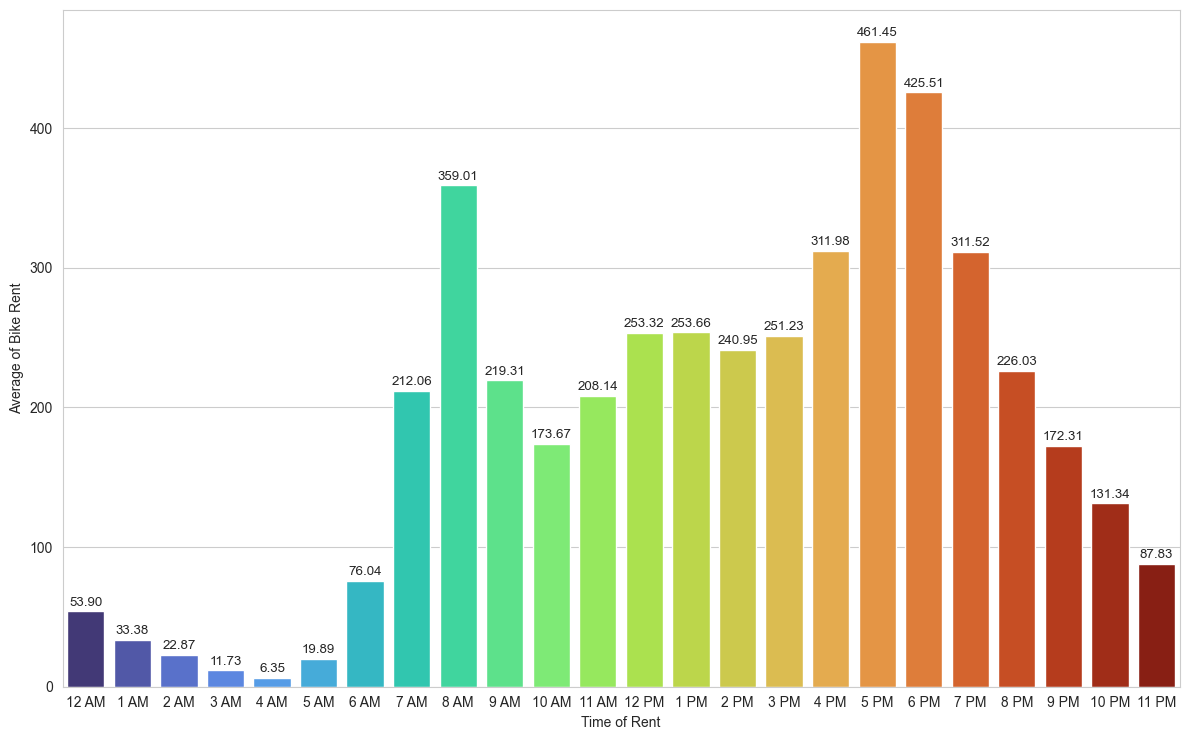

In [115]:
fig, ax = plt.subplots(figsize = (12,7.5))

ax = sb.barplot(data = df, x = 'hr', y = 'cnt', dodge = False, ax = ax, palette = 'turbo', errorbar = None)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=2, fontsize=9.6, fmt = "{:.2f}")
# ax.margins(x=0.15) # optionally more space for the text

#plt.xticks(rotation = 45)
plt.xlabel('Time of Rent')
plt.ylabel('Average of Bike Rent')
plt.tight_layout()
plt.show()

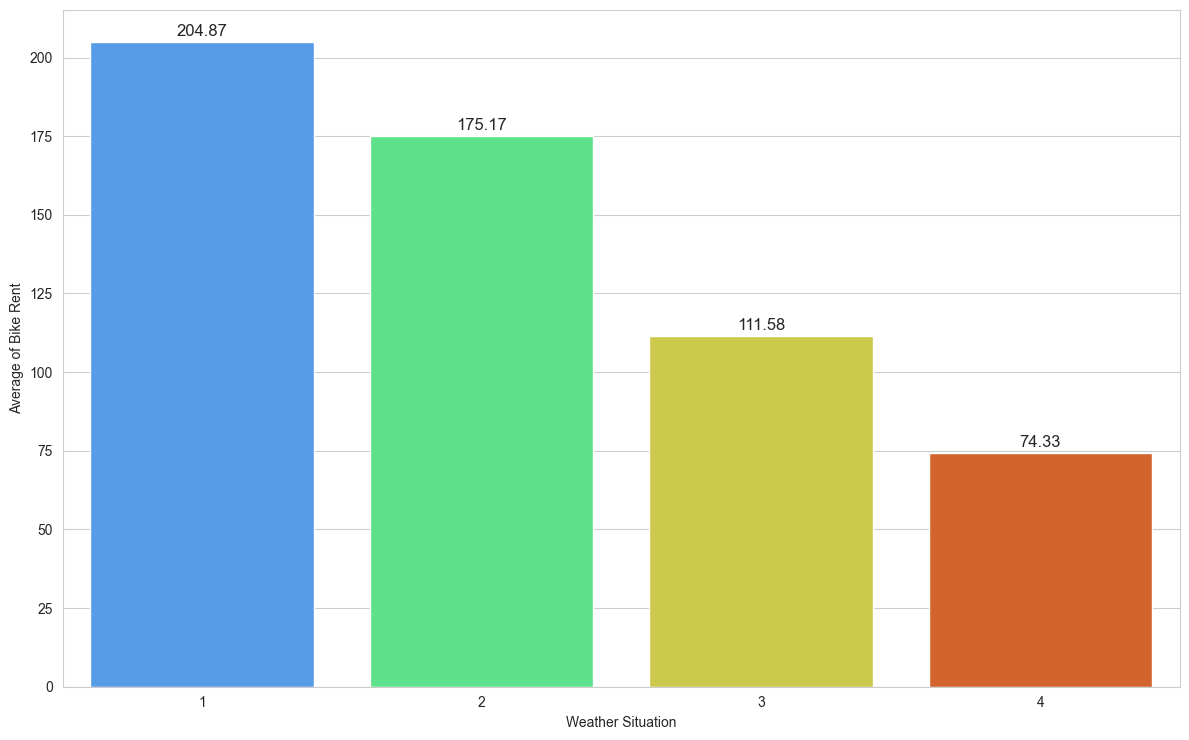

In [116]:
fig, ax = plt.subplots(figsize = (12,7.5))

ax = sb.barplot(data = df, x = 'weathersit', y = 'cnt', dodge = False, ax = ax, palette = 'turbo', errorbar = None)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=2, fontsize=12, fmt = "{:.2f}")

plt.xlabel('Weather Situation')
plt.ylabel('Average of Bike Rent')
plt.tight_layout()
plt.show()

### Pertanyaan 2

(Jawaban akan diberikan dan dijelaskan pada bagian Jawaban di bawah)

<Axes: xlabel='dteday', ylabel='cnt'>

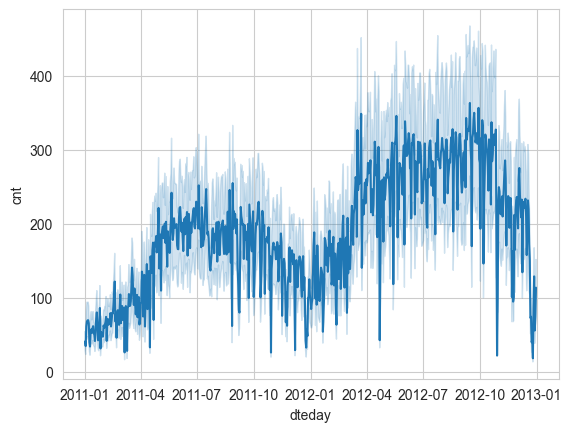

In [117]:
sb.lineplot(df, x = 'dteday', y = 'cnt')

Mengubah ke dalam bentuk mingguan agar meningkatkan keterbacaan grafik di atas

In [118]:
df_dateindex = df.copy()
df_dateindex.set_index('dteday', inplace = True)
df_dateindex

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,Springer,2011,January,12 AM,0,Sunday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01,2,Springer,2011,January,1 AM,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01,3,Springer,2011,January,2 AM,0,Sunday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01,4,Springer,2011,January,3 AM,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01,5,Springer,2011,January,4 AM,0,Sunday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,Springer,2012,Desember,7 PM,0,Tuesday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31,17376,Springer,2012,Desember,8 PM,0,Tuesday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31,17377,Springer,2012,Desember,9 PM,0,Tuesday,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [119]:
df_weekly = df_dateindex.resample('W-SUN', label='left', closed='left').sum().reset_index()
df_weekly

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_28200\4115601455.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = df_dateindex.resample('W-SUN', label='left', closed='left').sum().reset_index()


,dteday,instant,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2010-12-26,300,48264,0,0,38,8.26,8.7270,19.34,3.8507,331,654,985
1,2011-01-02,16905,323771,0,114,225,35.68,36.5161,85.51,31.5087,745,8642,9387
2,2011-01-09,43521,327793,0,115,215,27.72,28.0615,85.93,37.3596,477,8166,8643
3,2011-01-16,65527,309694,24,83,242,31.00,31.2432,85.00,32.8662,706,8282,8988
4,2011-01-23,79508,279529,0,93,221,23.84,25.4102,88.07,24.0903,632,6957,7589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2012-12-02,2813244,338016,0,120,255,64.14,64.3618,119.85,26.6876,4171,35012,39183
102,2012-12-09,2841468,338016,0,120,276,56.94,57.3164,113.87,29.2552,2983,32425,35408
103,2012-12-16,2869692,338016,0,120,273,58.12,57.5137,112.88,36.4485,2256,26439,28695
104,2012-12-23,2863251,333992,23,95,305,42.02,41.6208,115.13,31.5678,2081,8630,10711


In [120]:
df_weekly_mean = df_dateindex.resample('W-SUN', label='left', closed='left').mean().reset_index()
df_weekly_mean

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_28200\2897210835.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly_mean = df_dateindex.resample('W-SUN', label='left', closed='left').mean().reset_index()


,dteday,instant,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2010-12-26,12.5,2011.0,0.000000,0.000000,1.583333,0.344167,0.363625,0.805833,0.160446,13.791667,27.250000,41.041667
1,2011-01-02,105.0,2011.0,0.000000,0.708075,1.397516,0.221615,0.226808,0.531118,0.195706,4.627329,53.677019,58.304348
2,2011-01-09,267.0,2011.0,0.000000,0.705521,1.319018,0.170061,0.172156,0.527178,0.229200,2.926380,50.098160,53.024540
3,2011-01-16,425.5,2011.0,0.155844,0.538961,1.571429,0.201299,0.202878,0.551948,0.213417,4.584416,53.779221,58.363636
4,2011-01-23,572.0,2011.0,0.000000,0.669065,1.589928,0.171511,0.182807,0.633597,0.173312,4.546763,50.050360,54.597122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2012-12-02,16745.5,2012.0,0.000000,0.714286,1.517857,0.381786,0.383106,0.713393,0.158855,24.827381,208.404762,233.232143
102,2012-12-09,16913.5,2012.0,0.000000,0.714286,1.642857,0.338929,0.341169,0.677798,0.174138,17.755952,193.005952,210.761905
103,2012-12-16,17081.5,2012.0,0.000000,0.714286,1.625000,0.345952,0.342343,0.671905,0.216955,13.428571,157.375000,170.803571
104,2012-12-23,17248.5,2012.0,0.138554,0.572289,1.837349,0.253133,0.250728,0.693554,0.190167,12.536145,51.987952,64.524096


In [121]:
weekly = pd.concat([df_weekly_mean[['dteday', 'yr', 'temp', 'atemp', 'hum', 'windspeed']], df_weekly[['casual', 'registered', 'cnt']]], axis = 1)
weekly

,dteday,yr,temp,atemp,hum,windspeed,casual,registered,cnt
0,2010-12-26,2011.0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,2011.0,0.221615,0.226808,0.531118,0.195706,745,8642,9387
2,2011-01-09,2011.0,0.170061,0.172156,0.527178,0.229200,477,8166,8643
3,2011-01-16,2011.0,0.201299,0.202878,0.551948,0.213417,706,8282,8988
4,2011-01-23,2011.0,0.171511,0.182807,0.633597,0.173312,632,6957,7589
...,...,...,...,...,...,...,...,...,...
101,2012-12-02,2012.0,0.381786,0.383106,0.713393,0.158855,4171,35012,39183
102,2012-12-09,2012.0,0.338929,0.341169,0.677798,0.174138,2983,32425,35408
103,2012-12-16,2012.0,0.345952,0.342343,0.671905,0.216955,2256,26439,28695
104,2012-12-23,2012.0,0.253133,0.250728,0.693554,0.190167,2081,8630,10711


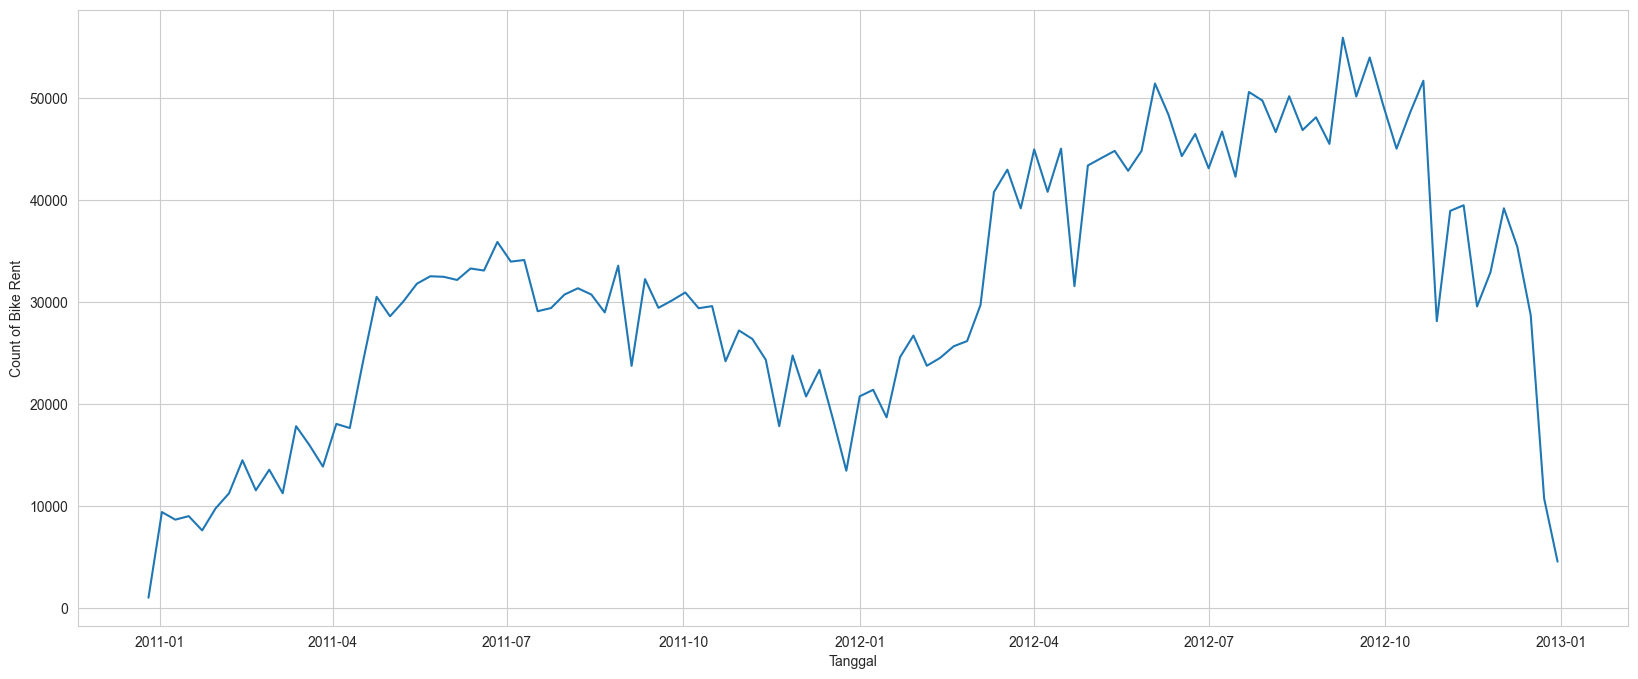

In [122]:
fig, ax = plt.subplots(figsize = (20,8))

ax = sb.lineplot(weekly, x = 'dteday', y = 'cnt')

plt.xlabel('Tanggal')
plt.ylabel('Count of Bike Rent')
plt.show()

In [123]:
weekly_2011 = weekly[weekly['dteday'] <= '2011-12-31'].reset_index(drop = True)
weekly_2011.head()

,dteday,yr,temp,atemp,hum,windspeed,casual,registered,cnt
0,2010-12-26,2011.0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,2011.0,0.221615,0.226808,0.531118,0.195706,745,8642,9387
2,2011-01-09,2011.0,0.170061,0.172156,0.527178,0.229200,477,8166,8643
3,2011-01-16,2011.0,0.201299,0.202878,0.551948,0.213417,706,8282,8988
4,2011-01-23,2011.0,0.171511,0.182807,0.633597,0.173312,632,6957,7589


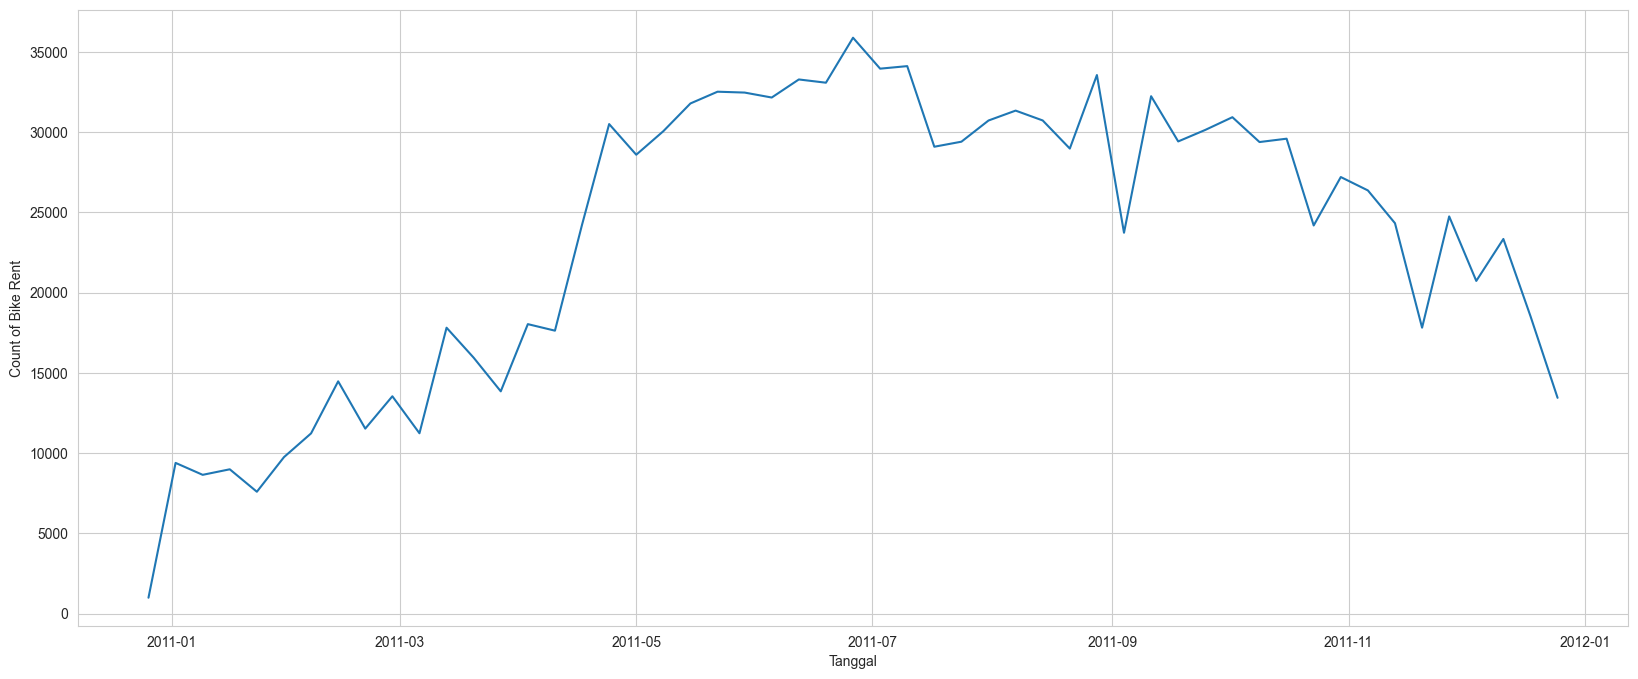

In [124]:
fig, ax = plt.subplots(figsize = (20,8))

ax = sb.lineplot(weekly_2011, x = 'dteday', y = 'cnt')

plt.xlabel('Tanggal')
plt.ylabel('Count of Bike Rent')
plt.show()

In [125]:
weekly_2012 = weekly[weekly['dteday'] >= '2012-01-01'].reset_index(drop = True)
weekly_2012.head()

,dteday,yr,temp,atemp,hum,windspeed,casual,registered,cnt
0,2012-01-01,2012.0,0.270539,0.269099,0.504671,0.220041,2631,18109,20740
1,2012-01-08,2012.0,0.282874,0.286058,0.632575,0.193675,1746,19634,21380
2,2012-01-15,2012.0,0.229701,0.224553,0.553293,0.269918,1049,17627,18676
3,2012-01-22,2012.0,0.300000,0.306721,0.748750,0.174582,2535,22037,24572
4,2012-01-29,2012.0,0.341071,0.337749,0.516548,0.199186,2196,24503,26699


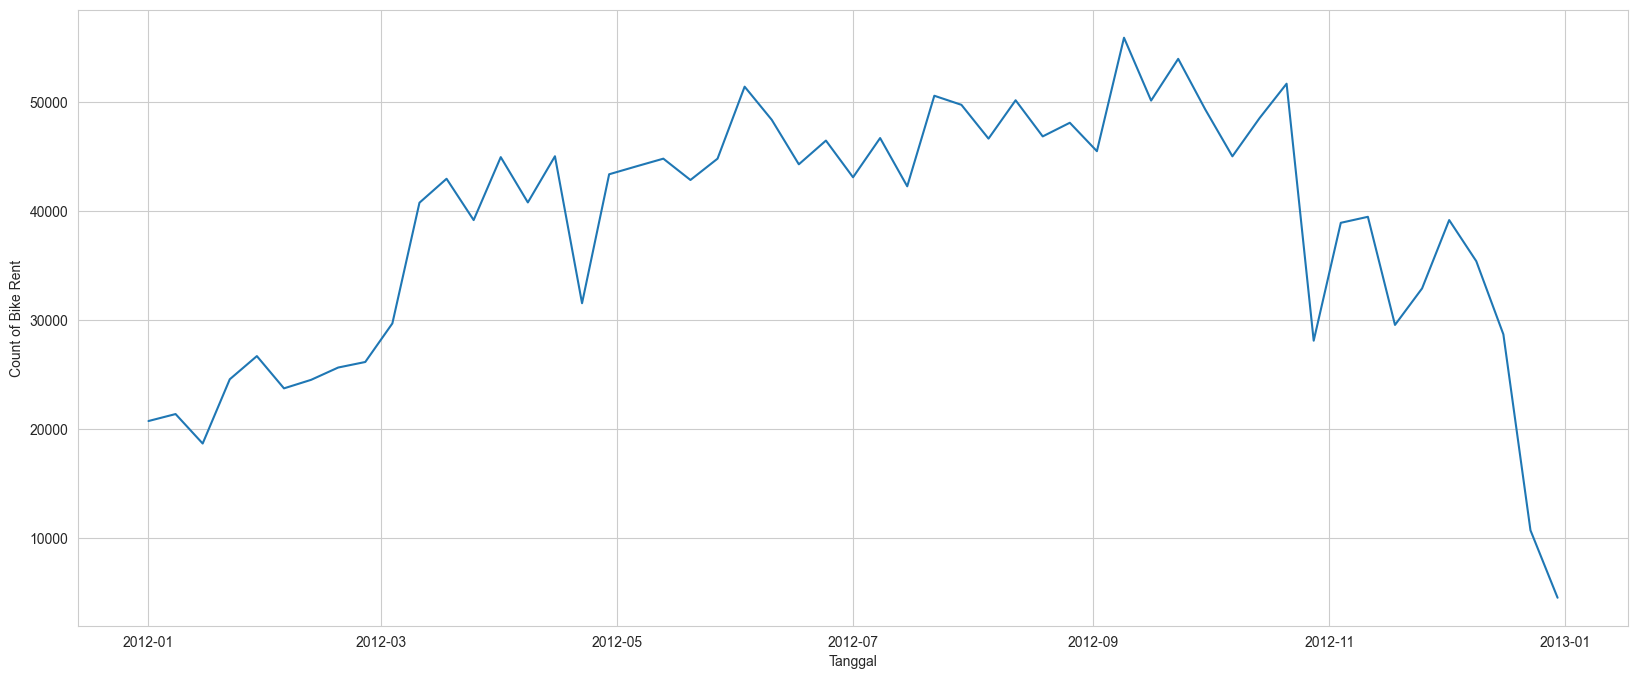

In [126]:
fig, ax = plt.subplots(figsize = (20,8))

ax = sb.lineplot(weekly_2012, x = 'dteday', y = 'cnt')

plt.xlabel('Tanggal')
plt.ylabel('Count of Bike Rent')
plt.show()

### Pertanyaan 3

(Jawaban akan diberikan dan dijelaskan pada bagian Jawaban di bawah)

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_28200\830271389.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot = True)


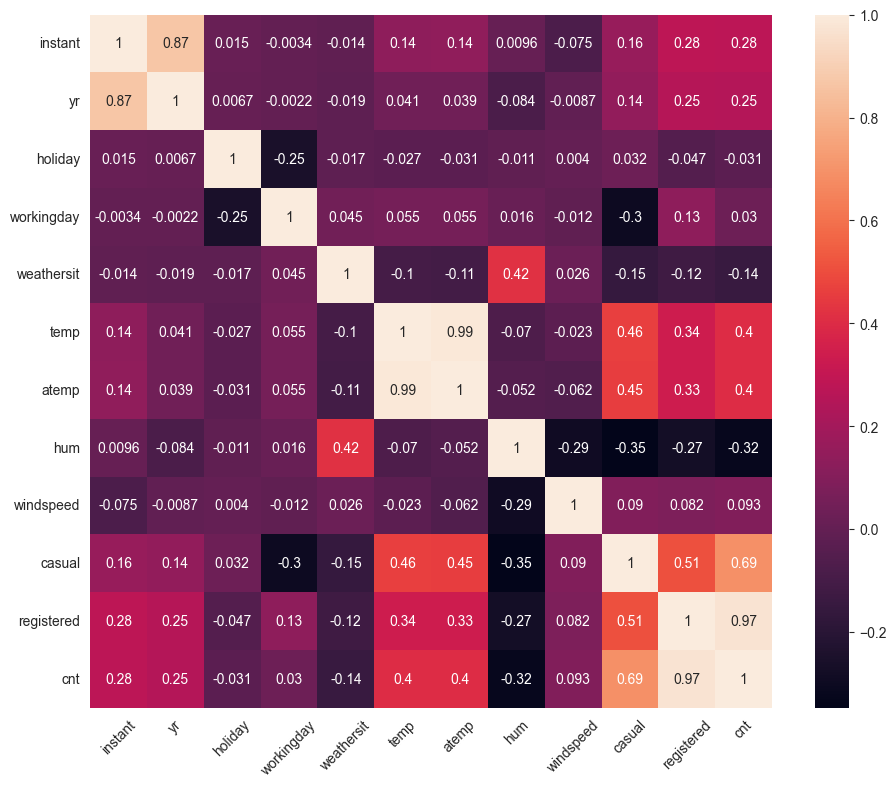

In [127]:
fig, ax = plt.subplots(figsize = (11,9))

sb.heatmap(df.corr(), annot = True)

plt.xticks(rotation = 45)
plt.show()

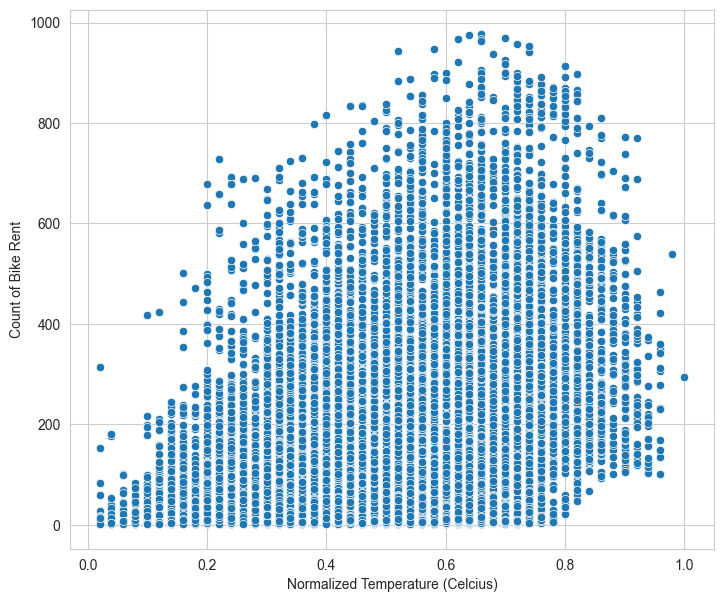

In [128]:
fig, ax = plt.subplots(figsize = (8.3,7))

sx = sb.scatterplot(df, x = 'temp', y = 'cnt')

plt.xlabel('Normalized Temperature (Celcius)')
plt.ylabel('Count of Bike Rent')
plt.show()

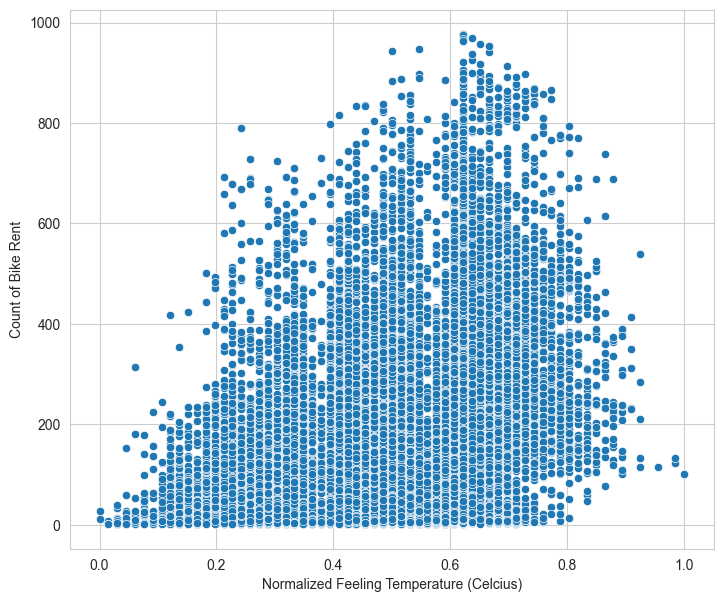

In [129]:
fig, ax = plt.subplots(figsize = (8.3,7))

sx = sb.scatterplot(df, x = 'atemp', y = 'cnt')

plt.xlabel('Normalized Feeling Temperature (Celcius)')
plt.ylabel('Count of Bike Rent')
plt.show()

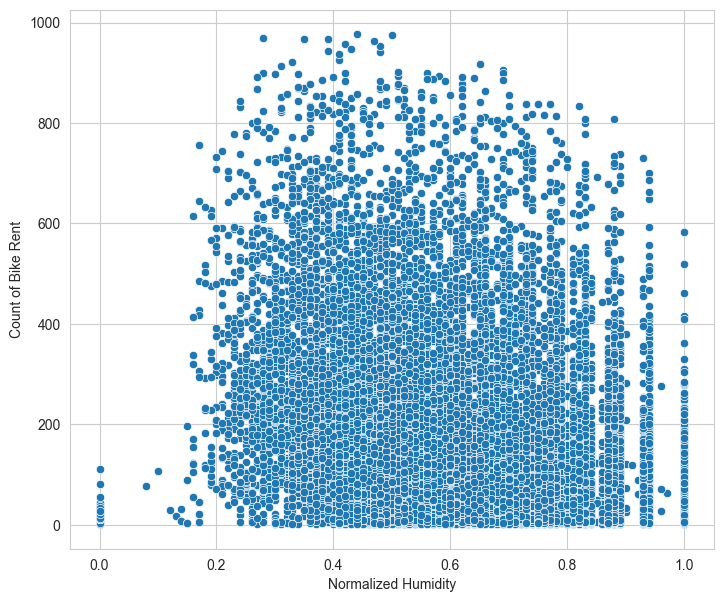

In [130]:
fig, ax = plt.subplots(figsize = (8.3,7))

sx = sb.scatterplot(df, x = 'hum', y = 'cnt')

plt.xlabel('Normalized Humidity')
plt.ylabel('Count of Bike Rent')
plt.show()

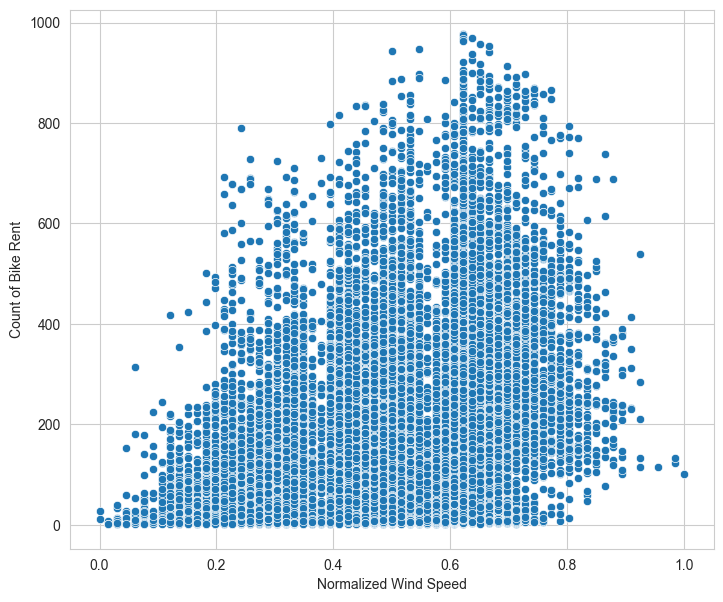

In [131]:
fig, ax = plt.subplots(figsize = (8.3,7))

sx = sb.scatterplot(df, x = 'atemp', y = 'cnt')

plt.xlabel('Normalized Wind Speed')
plt.ylabel('Count of Bike Rent')
plt.show()

## Jawaban / Kesimpulan

1. Tingkat peminjaman sepeda memiliki angka tertinggi pada musim semi, yang mana musim tersebut bertepatan dengan Bulan Juni sampai dengan September. Meski, tingkat peminjaman pada skala bulanan memiliki perbedaan tiap bulannya, tingkat peminjaman dalam skala harian cenderung sama atau mirip setiap harinya. Sedangkan, jika diamati lebih dalam, tingkat peminjaman sepeda memiliki angka yang cukup tinggi pada jam 8 pagi, jam 5 sore, dan jam 6 sore. Saya menduga bahwa hal ini dipengaruhi oleh jam pergi ke kantor dan pulang kantor, namun tidak ada data yang mendukung. Terakhir, ketika cuaca cerah, sedikit berawan, dan agak berawan, jika dibandingkan dengan kondisi cuaca yang lain memiliki tingkat peminjaman sepeda yang paling tinggi.

2. Tren tingkat peminjaman sepeda dari tahun ke tahun mengalami peningkatan, terlihat pada grafik bahwa pada bagian tahun 2012 titik berada lebih tinggi daripada 2011. Kemudian jika diteliti berdasarkan tiap tahun, tren peminjaman sepeda cenderung memiliki bentuk tren yang sama. Tren peminjaman sepeda tiap tahunnya akan bernilai rendah pada awal tahun, kemudian akan mengalami kenaikan, terutama pada bulan ke-3 atau ke-4, kemudian cenderung stabil, dan akan turun kembali di akhir tahun.

3. Berdasarkan grafik korelasi yang didapatkan, benar bahwa kondisi cuaca memengaruhi tingkat peminjaman sepeda. Namun, pengaruhnya cukup lemah, ditunjukkan oleh angkanya yang berada di bawah 0.5. Sebagai contoh, variabel *temp* dan *atemp* memiliki nilai korelasi sebesar 0.4 dan variabel *hum* sebesar -0.32, yang artinya semakin besar nilai *temp* atau *atemp* akan semakin tinggi tingkat peminjaman sepeda. Sedangkan, pada variabel *hum*, semakin besar nilai hum, maka akan semakin kecil tingkat peminjaman sepeda. Namun, nilai tersebut menunjukkan bahwa hubungannya cukup lemah. Kemudian pada variabel *windspeed*, nilai korelasi bernilai 0.093, dengan artian bahwa variabel ini memiliki hubungan yang sangat lemah dengan tingkat peminjaman sepeda.